# **Занятие 4. Часть 1. Работа с ОС и файлами**
#### 03.12.2020

**Преподаватель: Виктория Дочкина**

Ссылка на колаб: https://colab.research.google.com/drive/1CPpBfgw3HcKQcLhSS3jkFBUhT6avQhg_?usp=sharing

## План занятия

- Работа с Операционной Системой (библиотека os)
- Основы работы с файлами
    - .txt файлы
    - читаем docx, создаем docx
    - формат данных json
    - pandas: работаем с xlsx, csv


# Библиотека os

Модуль **os** в Python — это библиотека функций для работы с операционной системой. 

<center><img src="https://github.com/ddvika/Data-Science-School-2020/blob/main/lecture_4/imgs/import-os-python-1024x843.jpg?raw=true" width="350" height="300" class="center"><center>

Методы, включенные в неё позволяют определять тип операционной системы, получать доступ к переменным окружения, управлять директориями и файлами:
- узнавать/менять файловую структуру, изменять переменные среды
- проверка существования объекта по заданному пути;
- определение размера в байтах;
- удаление;
- переименование и др.

Программа, использующая переменные и функции модуля os, переносима с одной операционной системы на другую, так как os умеет учитывать особенности каждой ОС. 

### **name, environ, getcwd()**

Чтобы узнать имя текущей ОС необходимо вызвать метод `name`

In [ ]:
import os # Импортируем библиотеку

print(os.name)

posix


Получить информацию о  конфигурации компьютера, можно при помощи метода `environ`.

In [ ]:
print(os.environ)

environ({'NO_GCE_CHECK': 'True', 'GCS_READ_CACHE_BLOCK_SIZE_MB': '16', 'CLOUDSDK_CONFIG': '/content/.config', 'CUDA_VERSION': '10.1.243', 'PATH': '/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin', 'HOME': '/root', 'LD_LIBRARY_PATH': '/usr/local/nvidia/lib:/usr/local/nvidia/lib64', 'LANG': 'en_US.UTF-8', 'SHELL': '/bin/bash', 'LIBRARY_PATH': '/usr/local/cuda/lib64/stubs', 'CUDA_PKG_VERSION': '10-1=10.1.243-1', 'SHLVL': '0', 'GCE_METADATA_TIMEOUT': '0', 'NCCL_VERSION': '2.7.8', 'NVIDIA_VISIBLE_DEVICES': 'all', 'DEBIAN_FRONTEND': 'noninteractive', 'CUDNN_VERSION': '7.6.5.32', 'LAST_FORCED_REBUILD': '20201111', 'JPY_PARENT_PID': '49', 'PYTHONPATH': '/env/python', 'DATALAB_SETTINGS_OVERRIDES': '{"kernelManagerProxyPort":6000,"kernelManagerProxyHost":"172.28.0.3","jupyterArgs":["--ip=\\"172.28.0.2\\""]}', 'ENV': '/root/.bashrc', 'GLIBCXX_FORCE_NEW': '1', 'NVIDIA_DRIVER_CAPABILITIES': '

Попробуем узнать версию Куды

 (CUDA - архитектура позволяющая производить на GPU вычисления общего назначения, при этом GPU фактически выступает в роли мощного сопроцессора)

In [ ]:
os.environ['CUDA_VERSION']

'10.1.243'

Еще полезно узнать в какой директории мы сейчас находимся, давайте узнаем это при помощи `getcwd()`

In [ ]:
print(os.getcwd())

/content


### **mkdir(), makedirs(), listdir(), path.exists()**

При помощи метода `mkdir` довольно легко создать папку, просто указав для нее желаемый путь.

In [ ]:
folder_path = "test_folder"

os.mkdir(folder_path)

`listdir()` используем для перечисления всех папок в текущей директории

In [ ]:
os.listdir()

['.config',
 '.ipynb_checkpoints',
 'file_example_XLSX_1000.xlsx',
 'test_folder',
 'materials',
 'sample_data']

`path.exists()` проверяет наличие объекта по его названию

In [ ]:
os.path.exists(folder_path)

True

In [ ]:
os.path.exists("folder_1234")

False

Давайте еще раз создадим директорию `test_folder` и посмотрим что выйдет

In [ ]:
os.mkdir(folder_path)

FileExistsError: ignored

**Задание**

Как решить эту проблему? Что необходимо сделать чтобы создавать директорию только в том случае, когда нет директории с таким же именем?

In [ ]:
#TODO
if not os.path.exists(folder_path):
    os.mkdir(folder_path)
else:
    print('folder exists')

folder exists


**Задание**

проверить наличие директории, и если такая уже существует, то создавать новую директорию с приставкой "_1"

Например: если существует папка с названием "Новая_папка", то мы будем создавать  "Новая_папка_1" 

In [ ]:
#TODO
if os.path.exists(folder_path):
    os.mkdir(folder_path +'_1')

`makedirs()` создаст нам не одну, а несколько вложенных папок

In [ ]:
path = './folder_1/1/2/3'
os.makedirs(path)

### **remove(), rmdir()**

Функции **os.remove()** и **os.rmdir()** используются для удаления файлов и каталогов соответственно. 

Прежде чем воспользоваться функцией romve() нам нужен файл, который мы могли бы удалить. Для этого создадим с Вами txt файл ( Подробнее конструкцию `open` будем рассматривать позже в лекции!)

In [ ]:
with open('spam.txt', 'a') as f:
    f.write('**spam blah blah blah message**')

Теперь удалим его

In [ ]:
os.remove("spam.txt")

А теперь удалим директорию `test_folder_1`

In [ ]:
os.listdir()

['.config',
 'test_folder_1',
 '.ipynb_checkpoints',
 'test_array.npy',
 'file_example_XLSX_1000.xlsx',
 'test_folder',
 'folder_1',
 'materials',
 'sample_data']

In [ ]:
os.rmdir("test_folder_1")

In [ ]:
os.listdir()

['.config',
 '.ipynb_checkpoints',
 'test_array.npy',
 'file_example_XLSX_1000.xlsx',
 'test_folder',
 'folder_1',
 'materials',
 'sample_data']

И заодно удалим `folder_1`

In [ ]:
os.rmdir("folder_1")

OSError: ignored

Упс... rmdir() не умеет удалять непустые каталоги... Что же делать? Сейчас разберемся! Для этого нужно узнать о еще одном методе

### **os.walk()**

Метод os.walk() дает нам возможность для итерации на корневом уровне пути. Это значит, что мы можем назначить путь к этой функции и получить доступ ко всем её подкаталогам и файлам. 

In [ ]:
path = "folder_1"

In [ ]:
for i in os.walk(path):
    print(i)

('folder_1', ['1'], [])
('folder_1/1', ['2'], [])
('folder_1/1/2', ['3'], [])
('folder_1/1/2/3', [], [])


**Задание**

Создать папку в самой глубокой папке

In [ ]:
#TODO
deep_folder = list(os.walk(path))[-1][0]
deep_folder

'folder_1/1/2/3/4/5'

In [ ]:
os.mkdir(deep_folder+'/5')

**Задание**

Удалить папку `"folder_1"` при помощи **walk()**

In [ ]:
for root, dirs, files in os.walk(path):
    print(root)

folder_1
folder_1/1
folder_1/1/2
folder_1/1/2/3
folder_1/1/2/3/4
folder_1/1/2/3/4/5


Для случая удаления каталогов с вложенными файлами все же лучше всего подойдет библиотека **shutil**.
Давайте еще раз создадим директорию с вложенными папками и удалим ее при помощи **shutil.rmtree**

In [ ]:
for root, dirs, files in os.walk("folder_1"):
    print(root)

In [ ]:
supp_list[::-1]

['folder_1/1/2/3', 'folder_1/1/2', 'folder_1/1', 'folder_1']

In [ ]:
for path in supp_list[::-1]:
    os.rmdir(path)
    #print(path)

In [ ]:
import shutil
shutil.rmtree("folder_1", ignore_errors=True)

# Основы работы с файлами

Перед тем как прочесть и записать что-либо в файл, его следует открыть. Чтобы открыть файл в Python используется встроенная функция **open()**`. При вызове, эта функция создает объект типа файл, с которым в дальнейшем можно работать.

Синтаксис функции open() в Python:

```my_file = open(имя_файла , режим_доступа)```

При этом:
- `имя_файла`: строка, содержащая имя файла с расширением. Например, "my_file.txt".
- `режим_доступа`: строка, которой мы указываем для чего открывается файл: для чтения, записи, добавления информации, и т.д. Например, "w". По умолчанию файл открывается для чтения - "r".

Возможны следующие режимы доступа:

$$
\begin{array}{|l|l|}
\hline \ {\text { Режим }} &\begin{array}{c} {\text { Что позволяет делать? }}\end{array} \\
\hline \text { "г" } & \text { Чтение из файла (по умолчанию) } \\
\hline \text { "w" } & \text { Запись в файл. Если файл не существует, то он будет создан } \\
\hline \text { "x" } & \begin{array}{l}
\text { Запись в файл. Если файл не существует, то будет вызвано } \\
\text { исключение }\end{array}
\\
\hline \text { "a" } & \begin{array}{l}
\text { 3апись в файл. В отличие от предыдущих режимов, не стирает данные,} \\
\text{которые уже хранятся в файле, а добавляет новые в конец} \end{array}
\\
\hline \text { "t" } & \text { Открывает как текстовый файл (по умолчанию) } \\
\hline \text { "b" } & \text { Открывает как двоичный файл } \\
\hline \text { "+" } & \begin{array}{l}
\text { Позволяет работать с файлом как в режиме чтения, так и в режиме } \\
\text { записи }
\end{array} \\
\hline
\end{array}
$$

### **open(), close()**

ак уже упомяналось выше, перед тем как прочесть и/или записать что-либо в файл, его следует открыть. Чтобы открыть файл в Python используется встроенная функция open()

In [ ]:
my_file = open("some.txt", "w")
print("Имя файла: ", my_file.name)
print("Файл закрыт: ", my_file.closed)
print("В каком режиме файл открыт: ", my_file.mode)

Имя файла:  some.txt
Файл закрыт:  False
В каком режиме файл открыт:  w


In [ ]:
my_file = open("some.txt")
print("Имя файла: ", my_file.name)
print("Файл закрыт: ", my_file.closed)
my_file.close()
print("А теперь закрыт: ", my_file.closed)

Имя файла:  some.txt
Файл закрыт:  False
А теперь закрыт:  True


## Чтение и запись файлов

### **write(), read()**

Метод **write()** записывает любую строку в открытый файл. Важно помнить, что строки в Python могут содержать двоичные данные, а не только текст.
Метод **write()** не добавляет символ переноса строки ('\n') в конец файла.

In [ ]:
my_file = open("some.txt", "w")
my_file.write("Мне нравится Python!\nЭто классный язык!")
my_file.close()

**Табуляция "\n" переносит строку**



А теперь прочтем наш файл

In [ ]:
my_file = open("some.txt")
my_string = my_file.read()
print(my_string)
my_file.close()

Мне нравится Python!
Это классный язык!


Однако более pythonic way стиль работы с файлом встроенными средствами заключается в использовании конструкции `with .. as .. `, которая работает как менеджер создания контекста. Написанный выше пример можно переписать с ее помощью

In [ ]:
with open("some.txt", "w") as f:
    f.write("Мне нравится Python!\nЭто классный язык!")

Главное отличие заключается в том, что python самостоятельно закрывает файл

In [ ]:
with open("some.txt", "r") as f:
    my_string = f.read()
print(my_string)

Мне нравится Python!
Это классный язык!


**Задание**

Создать папку **folder_for_txt** и записать туда файл **DS_SCHOOL** формата .txt с текстом **"Меня зовут ..."**

In [ ]:
#TODO
path = "folder_for_txt"
#os.mkdir(path)
with open(path + "/DS_SCHOOL.txt", "w") as f:
    f.write("Меня зовут ..")

**Задание**

Открыть уже имеющийся файл **DS_SCHOOL.txt** и добавить туда еще одну строку **"Я участник школы DS"**.

In [ ]:
#TODO
with open(path + "/DS_SCHOOL.txt", "a") as f:
    f.write("\n Я участник школы DS")

In [ ]:
with open(path + "/DS_SCHOOL.txt", "r") as f:
    my_string = f.read()
print(my_string)

Меня зовут ..
 Я участник школы DS


**Задание**
У нас есть файл формата .txt с номерами мобильных телефонов. Давайте сопоставим эти номера с Рандомными именами и сохраним в новый txt файл

(Подсказка - полезный метод split())

In [ ]:
with open("materials/phone_numbers.txt", "r") as f:
    my_string = f.read()

In [ ]:
my_string

'916-864-5898\n416-759-5238\n313-996-9660\n401-719-2363\n575-640-3953\n513-922-6636\n217-278-7590\n719-955-1188\n919-589-0483\n408-858-9751\n318-941-0172\n519-416-2487\n802-828-6400\n214-401-0509\n660-963-5434\n972-638-7017\n612-870-6798\n510-441-5319\n512-935-6108\n337-374-6282\n580-919-0103\n314-997-5908\n503-593-8702\n260-430-5146\n864-993-6989\n870-894-4061\n207-556-3161\n403-612-4414\n978-573-8747\n864-995-1281\n402-260-0543\n828-214-3674\n925-392-4478\n808-333-7943\n801-481-8889\n601-364-3798\n408-524-7459\n712-427-7328\n801-815-0922\n914-745-9244\n618-289-2805\n979-664-2234\n636-583-8221\n812-815-0121\n317-234-2340\n270-828-1009\n214-218-0213\n970-587-1048\n917-803-0072\n972-676-1239'

In [ ]:
#TODO
phone_numbers = my_string.split('\n')

Сгенерируем рандомные имена:

In [ ]:
names = ["Unknown_" + str(i) for i in range(len(phone_numbers))] #TODO

In [ ]:
assert len(names)==len(phone_numbers)

In [ ]:
with open("materials/phone_numbers_with_names_edit.txt", "w") as f:
    for name, number in zip(names, phone_numbers):
        f.write(f'{name} {number}\n')
        f.write(str(name) + ' ' + str(number) + '\n')
        #TODO

Или при помощи **{format}**

In [ ]:
with open("materials/phone_numbers_with_names.txt", "w") as f:
    for name, number in zip(names, phone_numbers):
        f.write("{} {}\n".format(name, number)) 

## А теперь поработаем с Word файлами

### Чтение и обработка docx файла

Для удобной работы с '.docx' файлами установим библиотеку [**python-docx**](https://python-docx.readthedocs.io/en/latest/)

In [ ]:
!pip install python-docx

     |████████████████████████████████| 5.5MB 12.0MB/s 
  Created wheel for python-docx: filename=python_docx-0.8.10-cp36-none-any.whl size=184491 sha256=9c8c07740a5a57bde9dc9aa126be9dbb8dabcc7ec5085be0e45611ddef0b71d0
  Stored in directory: /root/.cache/pip/wheels/18/0b/a0/1dd62ff812c857c9e487f27d80d53d2b40531bec1acecfa47b
Successfully built python-docx


Метод **Document()** позволяет открыть сам docx файл. Объект Document содержит список объектов Paragraph, которые представляют собой абзацы документа. при помощи вызова **Paragraph.text** получаем текст строки нашего документы в строковом формате

In [ ]:
import docx

doc = docx.Document("materials/File 1.docx")

In [ ]:
doc

In [ ]:
all_paras = doc.paragraphs
len(all_paras)

30

In [ ]:
all_paras[20].text

'PURCHASED:'

In [ ]:
all_paras[0].runs[0].text

'FTC DEMO COMPANY'

In [ ]:
all_paras[0].text

'FTC DEMO COMPANY'

In [ ]:
for para in all_paras:
    print(para.text)
    print("-------")

FTC DEMO COMPANY
-------
1 Main Street, Washington, DC 20001
-------
PH: (800) 123-4567 FX: (424) 456-1231
-------

-------

-------

-------
TRADE CONFIRMATION STATEMENT
-------

-------

-------
DATE: 12/5/11
-------

-------
ACCOUNT NUMBER: 657321
-------

-------
CLIENT NAME: Jamie Smith 
-------

-------
STREET ADDRESS: 4 N St., NW 
-------
CITY: Washington
-------
STATE: DC		
-------
ZIP: 20003
-------

-------
PURCHASED:
-------

-------
	
-------
ADMINISTRATION FEE: $6872.00
-------

-------

-------
	
-------
MONEY RECEIVED: $235
-------

-------

-------


In [ ]:
our_doc = ""
our_doc_list = []
for para in all_paras:
    our_doc+= ' ' + para.text
    our_doc_list.append(para.text)

#our_doc_list = ' '.join(our_doc_list)

In [ ]:
our_doc

' FTC DEMO COMPANY 1 Main Street, Washington, DC 20001 PH: (800) 123-4567 FX: (424) 456-1231    TRADE CONFIRMATION STATEMENT   DATE: 12/5/11  ACCOUNT NUMBER: 657321  CLIENT NAME: Jamie Smith   STREET ADDRESS: 4 N St., NW  CITY: Washington STATE: DC\t\t ZIP: 20003  PURCHASED:  \t ADMINISTRATION FEE: $6872.00   \t MONEY RECEIVED: $235  '

**Задание**

Извлечь из полученного документа значения CLIENT NAME, ACCOUNT NUMBER. и сохранить в словарь в формате {CLIENT NAME : ACCOUNT NUMBER}


In [ ]:
# Некоторые полезные методы:
x = 'id: 001'
print(x.split('id: ')) # строковый метод split()
print(x.replace('id: ', '')) # строковый метод replace()

['', '001']
001


In [ ]:
# HINTS
"""
строковый метод .replace() и регулярное выражение re.sub()
выполняют одинаковый функционал - производят поиск шаблона в строке 
и заменяют его на указанную подстроку"""

import re

print(re.sub('id: ', '', x))

print(re.findall(r'\d{3}', x))

001
['001']


Одно из возможных **не оптимальных** решений

In [ ]:
#name = ""
#number = ""
for para in all_paras:
    if "CLIENT NAME" in para.text:
        name = para.text.replace('CLIENT NAME: ', '')
    elif "ACCOUNT NUMBER" in para.text:
        number = para.text.replace('ACCOUNT NUMBER: ', '')

print("CLIENT NAME: ", name)
print('ACCOUNT NUMBER: ', number)

CLIENT NAME:  Jamie Smith 
ACCOUNT NUMBER:  657321


In [ ]:
int(number)

657321

In [ ]:
target_dict = {name: int(number)}
print(target_dict)

{'Jamie Smith ': 657321}


## ДОП Задание

Оптимизировать функцию

У нас много таких файлов! Давайте обернем наш код в фукцию и выполним его на всех файлах из папки materials

In [ ]:
def extract_dict(filepath):
    #Коммент
    doc = docx.Document(filepath)
    all_paras = doc.paragraphs

    for para in all_paras:
        if "CLIENT NAME" in para.text:
            name = para.text.replace('CLIENT NAME: ', '')
        elif "ACCOUNT NUMBER" in para.text:
            number = para.text.replace('ACCOUNT NUMBER: ', '')
    return name, number

Давайте сначала достанем названия всех наших docx файлов при помощи библиотеки **os** (файлы лежат в директории materials)

In [ ]:
base_path = "materials/"
paths = os.listdir(base_path)

#TODO
print(paths)


['File 2.docx', 'File 4.docx', '.ipynb_checkpoints', 'phone_numbers_with_names_edit.txt', 'phone_numbers.txt', 'File 5.docx', 'data_file.json', 'File 3.docx', 'File 1.docx']


In [ ]:
paths[0][-5:]

'.docx'

In [ ]:
for path in paths:
    if '.docx' in path[-5:]:
        continue
    else:
        paths.remove(path)

In [ ]:
sorted(paths)

['File 1.docx', 'File 2.docx', 'File 3.docx', 'File 4.docx', 'File 5.docx']

А теперь посмотрим насколько это удобнее при помощи библиотеки **glob**

In [ ]:
import glob

#TODO
paths = sorted(glob.glob("materials/*.docx"))

In [ ]:
paths

['materials/File 1.docx',
 'materials/File 2.docx',
 'materials/File 3.docx',
 'materials/File 4.docx',
 'materials/File 5.docx']

In [ ]:
extract_dict(paths[3])

('Jordan Davies ', '364795')

In [ ]:
target_dict = {}
target_dict['a'] = 0
target_dict

{'a': 0}

А теперь запишем информацию из всех .docx файлов. словарь target_dict

In [ ]:
target_dict = {}
#TODO
for path in paths:
    name, number = extract_dict(path)
    target_dict[name] = number

In [ ]:
target_dict

{'James Humpry ': '416',
 'Jamie Smith ': '657321',
 'Jordan Davies ': '364795',
 'Michael Goldman ': '436'}

Вуаля!

Полученный словарь необходим будет для следующих задач - а именно в разделе про **json**

### А теперь создадим docx прямо из питона

In [ ]:
from docx import Document
from docx.shared import Inches

In [ ]:
# Инициализируем документ

document = Document()

document.paragraphs # мы уже знакомы с вызовом paragraphs

[]

Метод `add_paragraph()` добавляет новую строку в документ

In [ ]:
p = document.add_paragraph('Строка 1: Вау! в Питоне можно эмулировать Word? ')

Посмотрим теперь на количество строк

In [ ]:
len(document.paragraphs)

1

Выведем содержимое

In [ ]:
document.paragraphs[0].text

'Строка 1: Вау! в Питоне можно эмулировать Word? '

метод `add_run(str text[, str style])` добавляет в параграф, возвращает экземпляр текста 

In [ ]:
p.add_run(' и зачем мне теперь MS office? ')

In [ ]:
document.paragraphs[0].text

'Строка 1: Вау! в Питоне можно эмулировать Word?  и зачем мне теперь MS office? '

In [ ]:
document.add_heading('Заголовок, level 1', level=1)

In [ ]:
document.paragraphs[1].text

'Заголовок, level 1'

Также существует множество других методов,Например:
- `add_picture()` добавляет картинку в документ
- `add_table()` добавляет таблицу
- `add_page_break()` добавляет новый лист
- и тд и тд

Их и многие другие Вы можете изучить самостоятельно в [документации docx](http://www.ilnurgi1.ru/docs/python/modules_user/docx.html)

In [ ]:
document.add_page_break() # Добавим пустой лист

In [ ]:
document.save('demo.docx') # Сохраним полученный документ и посмотри что получилось

# JSON
**JSON** - один из форматов данных, основанный на принципе пар ключ-значение и упорядоченных списках.
Файл JSON представляет собой более простую и лёгкую альтернативу расширению с аналогичными функциями XML (Extensive Markup Language).

json - это удобный формат сериализации данных. Возможность сериализации/десериализации в json есть буквально во всех языках программирования что делает этот формат довольно **универсальным.**

За последние 15 лет JSON стал формальным стандартом обмена данными и используется практически везде в интернете. Сегодня он используется практически всеми веб-серверами. К такой популярности привело еще и то, что многие базы данных поддерживали JSON. Современные реляционные базы данных, такие как PostgreSQL и MySQL теперь поддерживают хранение и экспорт данных в JSON. 

Однако у него есть и свои минусы:
- Нет типа даты. разработчики должны использовать строковые представления дат, что может вызвать несоответствие форматирования. 
- Нет комментариев - вы не сможете делать аннотации для полей, которые требуют этого прямо в коде

**JSON vs XML**
основной альтернативой JSON был и является XML. Однако XML становится все менее распространенным в новых системах. И очень легко понять почему. В дополнение к избыточности кода, по сути запись данных в XML занимает в несколько раз больше места.

In [ ]:
import json

Синтаксис загрузки json файлов похож на загрузку .txt файлов, только теперь используем метод **json.load**

In [ ]:
with open("materials/data_file.json", "r") as read_file:
    data = json.load(read_file)

In [ ]:
data

{'additionalProperties': {'example': 'xyz'},
 'arrears': False,
 'billerData1': 'TEST COMMENT',
 'billerData2': 'TEST DATA',
 'billerTaxRate': {'id': 51},
 'client': {'accountNumber': 'ACME001', 'id': 12351},
 'clientContact': {'emailAddress': 'robert@billdozer.com',
  'id': 59039,
  'idNumber': '',
  'name': 'Robert Pretorius'},
 'clientContactExclusive': False,
 'clientContract': {'contractNumber': 'ACME001', 'id': 59045},
 'clientTransactionLines': [{'accountingCode': {'code': '1',
    'id': 353,
    'name': 'sales one',
    'quantity': 1.0,
    'unitAmount': 200.0},
   'description': 'sales one',
   'quantity': 1.0,
   'taxable': True,
   'unitAmountExcludingTax': 180.0,
   'unitAmountIncludingTax': 200.0}],
 'collectOnContract': True,
 'currency': 'ZAR',
 'dateDelivery': '2015-04-27T00:00:00UTC',
 'dateDue': '2015-04-27T00:00:00UTC',
 'dateIssued': '2015-04-27T00:00:00UTC',
 'discount': 0,
 'info': 'TEST INFO',
 'paymentStatus': 'UNPAID',
 'paymentTerms': 0,
 'poNumber': 0,
 'refe

In [ ]:
data.keys()

dict_keys(['poNumber', 'discount', 'paymentTerms', 'reference', 'paymentStatus', 'type', 'clientContactExclusive', 'collectOnContract', 'info', 'dateIssued', 'dateDelivery', 'dateDue', 'currency', 'billerData1', 'billerData2', 'arrears', 'testMode', 'clientTransactionLines', 'client', 'clientContract', 'clientContact', 'billerTaxRate', 'additionalProperties'])

Нам интересно извлечь следующие данные:

- 'clientContact'
- 'unitAmountExcludingTax'
- 'unitAmountIncludingTax'

видим что последние два параметра лежат в 'clientTransactionLines'

In [ ]:
data['clientContact']['name']

'Robert Pretorius'

In [ ]:
x = data['clientTransactionLines'][0]['unitAmountExcludingTax']

180.0

**Задание**

Извлечь цену без налога и с налогом. Оценить % налога.

In [ ]:
x = data['clientTransactionLines'][0]['unitAmountExcludingTax']
y = data['clientTransactionLines'][0]['unitAmountIncludingTax']

tax = (y-x)/y * 100

print('tax is ', round(tax, 3), '%')

tax is  10.0 %


Помните наш словарь из пункта про работу с Word файлами?

In [ ]:
target_dict

{'James Humpry ': '416',
 'Jamie Smith ': '657321',
 'Jordan Davies ': '364795',
 'Michael Goldman ': '436'}

Давайте сораним его в формате json, для этого используем метод **dump()**

In [ ]:
with open("ppl_accounts.json", "w") as write_file:
    json.dump(target_dict, write_file)

Проверим корректность загрузки

In [ ]:
with open("ppl_accounts.json", "r") as read_file:
    target_dict = json.load(read_file)

In [ ]:
target_dict

{'James Humpry ': '416',
 'Jamie Smith ': '657321',
 'Jordan Davies ': '364795',
 'Michael Goldman ': '436'}

### Работа с API

In [ ]:
import json
import requests

Нам нужно выполнить запрос API в сервис JSONPlaceholder, для выполнения запроса используем библиотеку **requests**

In [ ]:
response = requests.get("https://jsonplaceholder.typicode.com/todos")

todos = json.loads(response.text) # переводит json-форматированные данные в настоящий json

In [ ]:
todos[100]

{'completed': False,
 'id': 101,
 'title': 'explicabo enim cumque porro aperiam occaecati minima',
 'userId': 6}

In [ ]:
len(todos)

In [ ]:
todos[1].keys()

dict_keys(['userId', 'id', 'title', 'completed'])

In [ ]:
response.json() == todos

True

In [ ]:
todos[:4]

[{'completed': False, 'id': 1, 'title': 'delectus aut autem', 'userId': 1},
 {'completed': False,
  'id': 2,
  'title': 'quis ut nam facilis et officia qui',
  'userId': 1},
 {'completed': False, 'id': 3, 'title': 'fugiat veniam minus', 'userId': 1},
 {'completed': True, 'id': 4, 'title': 'et porro tempora', 'userId': 1}]

In [ ]:
todos[58:62]

[{'completed': False,
  'id': 59,
  'title': 'perspiciatis velit id laborum placeat iusto et aliquam odio',
  'userId': 3},
 {'completed': True,
  'id': 60,
  'title': 'et sequi qui architecto ut adipisci',
  'userId': 3},
 {'completed': True,
  'id': 61,
  'title': 'odit optio omnis qui sunt',
  'userId': 4},
 {'completed': False,
  'id': 62,
  'title': 'et placeat et tempore aspernatur sint numquam',
  'userId': 4}]

In [ ]:
response = requests.get("https://jsonplaceholder.typicode.com/todos")
todos = json.loads(response.text)
 
# Соотношение userId с числом выполненных пользователем задач.
todos_by_user = {}

In [ ]:
for todo in todos:
    if todo["completed"]:
        todos_by_user[str(todo["userId"])] = 0

In [ ]:
for todo in todos:
    if todo["completed"]:
        todos_by_user[str(todo["userId"])] += 1

In [ ]:
todos_by_user

{'1': 11,
 '10': 12,
 '2': 8,
 '3': 7,
 '4': 6,
 '5': 12,
 '6': 6,
 '7': 9,
 '8': 11,
 '9': 8}

In [ ]:
todos_by_user.items()

dict_items([('1', 11), ('2', 8), ('3', 7), ('4', 6), ('5', 12), ('6', 6), ('7', 9), ('8', 11), ('9', 8), ('10', 12)])

In [ ]:
# Создание отсортированного списка пар (userId, num_complete).
top_users = sorted(todos_by_user.items(), 
                   key=lambda x: x[1], reverse=True)


In [ ]:
top_users

[('5', 12),
 ('10', 12),
 ('1', 11),
 ('8', 11),
 ('7', 9),
 ('2', 8),
 ('9', 8),
 ('3', 7),
 ('4', 6),
 ('6', 6)]

In [ ]:
 #Получение максимального количества выполненных задач.
max_complete = top_users[0][1]
max_complete

12

In [ ]:
todos_by_user

{'1': 11,
 '10': 12,
 '2': 8,
 '3': 7,
 '4': 6,
 '5': 12,
 '6': 6,
 '7': 9,
 '8': 11,
 '9': 8}

In [ ]:
top_users

[('5', 12),
 ('10', 12),
 ('1', 11),
 ('8', 11),
 ('7', 9),
 ('2', 8),
 ('9', 8),
 ('3', 7),
 ('4', 6),
 ('6', 6)]

In [ ]:
max_complete

12

In [ ]:
users = []
for user, num_complete in top_users:
    if num_complete < max_complete:
        break
    users.append(str(user))
 
max_users = " and ".join(users)

In [ ]:
users

['5', '10']

In [ ]:
max_users

'5 and 10'

In [ ]:
s = "s" if len(users) > 1 else ""

print(f"user{s} {max_users} completed {max_complete} TODOs")

users 5 and 10 completed 12 TODOs


In [ ]:
%%writefile test_keep.py

# Определить функцию filter() выполненных задач
# для пользователей с максимально выполненными задачами (те для users 5 и 10 )

def keep(todo, users=[5, 10]):
    is_complete = todo['completed'] #True/False
    has_max_count =  todo["userId"] in users #True/False
    return is_complete and has_max_count

Writing test_keep.py


In [ ]:
filtered_todos = list(filter(keep, todos))

вспомним как записать функцию в .py файл?

**Задание**

Записать функцию **keep** в отдельный модуль **keep_func** и ипортировать ее из этого же модуля при помощи **import**

In [ ]:
#TODO
from test_keep import *

In [ ]:
filtered_todos = list(filter(keep, todos))

In [ ]:
# Записать отфильтрованные задачи в файл
with open("filtered_data_file.json", "w") as data_file:
    filtered_todos = list(filter(keep, todos))
    json.dump(filtered_todos, data_file, indent=2)

# Pandas: работаем с xlsx, csv

У Pandas множество методов для считывания данных, эта библиотека может открывать следующие типы данных:

- pandas.read_pickle()
- pandas.read_csv()
- pandas.read_csv()
- pandas.read_sql()
- pandas.read_html()

и еще много других!

In [ ]:
import pandas as pd

Немного отвлечемся перед переходом к работе с csv и excel и попробуем загрузить созданный нами json файл в таблицу Pandas Dataframe при помощи метода **read_json()**

In [ ]:
df = pd.read_json("filtered_data_file.json")

При помощи метода **head()** выведем первые 5 строк, при помощи **tail()** последние 5

In [ ]:
df.head(5)

,userId,id,title,completed
0,5,81,suscipit qui totam,True
1,5,83,quidem at rerum quis ex aut sit quam,True
2,5,85,et quia ad iste a,True
3,5,86,incidunt ut saepe autem,True
4,5,87,laudantium quae eligendi consequatur quia et v...,True


In [ ]:
df.tail(5)

,userId,id,title,completed
19,10,195,rerum ex veniam mollitia voluptatibus pariatur,True
20,10,196,consequuntur aut ut fugit similique,True
21,10,197,dignissimos quo nobis earum saepe,True
22,10,198,quis eius est sint explicabo,True
23,10,199,numquam repellendus a magnam,True


Теперь откроем **csv** файл

Скачаем датасет ["Balance of payments and international investment position: June 2020"](https://www.stats.govt.nz/large-datasets/csv-files-for-download/)


In [ ]:
df = pd.read_csv("https://www.stats.govt.nz/assets/Uploads/Balance-of-payments/Balance-of-payments-and-international-investment-position-June-2020-quarter/Download-data/balance-of-payments-international-investment-position-jun20-csv-tables.zip",
                 compression='zip', delimiter = ",")
df = df[:10000]

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.head()

,Series_reference,Period,Data_value,Suppressed,STATUS,UNITS,MAGNTUDE,Subject,Group,Series_title_1
0,BOPQ.S06AC000000000A,1971.06,426.0,NaN,F,Dollars,6,Balance of Payments - BOP,"BPM6 Quarterly, Balance of payments major comp...",Actual
1,BOPQ.S06AC000000000A,1971.09,435.0,NaN,F,Dollars,6,Balance of Payments - BOP,"BPM6 Quarterly, Balance of payments major comp...",Actual
2,BOPQ.S06AC000000000A,1971.12,360.0,NaN,F,Dollars,6,Balance of Payments - BOP,"BPM6 Quarterly, Balance of payments major comp...",Actual
3,BOPQ.S06AC000000000A,1972.03,417.0,NaN,F,Dollars,6,Balance of Payments - BOP,"BPM6 Quarterly, Balance of payments major comp...",Actual
4,BOPQ.S06AC000000000A,1972.06,528.0,NaN,F,Dollars,6,Balance of Payments - BOP,"BPM6 Quarterly, Balance of payments major comp...",Actual


In [ ]:
df.shape

(10000, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Series_reference  10000 non-null  object 
 1   Period            10000 non-null  float64
 2   Data_value        7969 non-null   float64
 3   Suppressed        0 non-null      object 
 4   STATUS            10000 non-null  object 
 5   UNITS             10000 non-null  object 
 6   MAGNTUDE          10000 non-null  int64  
 7   Subject           10000 non-null  object 
 8   Group             10000 non-null  object 
 9   Series_title_1    10000 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 781.4+ KB


Нас интересует столбец "Value". Посмотрим на тип его данных

In [ ]:
df['Data_value'].dtype

dtype('float64')

In [ ]:
df = df.drop(columns = ['Suppressed'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Series_reference  10000 non-null  object 
 1   Period            10000 non-null  float64
 2   Data_value        7969 non-null   float64
 3   STATUS            10000 non-null  object 
 4   UNITS             10000 non-null  object 
 5   MAGNTUDE          10000 non-null  int64  
 6   Subject           10000 non-null  object 
 7   Group             10000 non-null  object 
 8   Series_title_1    10000 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 703.2+ KB


In [ ]:
df = df.dropna()

In [ ]:
df.shape

(7969, 9)

In [ ]:
df.tail(3)

,Series_reference,Period,Data_value,STATUS,UNITS,MAGNTUDE,Subject,Group,Series_title_1
9944,BOPQ.S06AC000A210221,2019.12,434.0,F,Dollars,6,Balance of Payments - BOP,"BPM6 Quarterly, Current account primary income",Actual
9945,BOPQ.S06AC000A210221,2020.03,463.0,R,Dollars,6,Balance of Payments - BOP,"BPM6 Quarterly, Current account primary income",Actual
9946,BOPQ.S06AC000A210221,2020.06,766.0,F,Dollars,6,Balance of Payments - BOP,"BPM6 Quarterly, Current account primary income",Actual


Обновим индексы в нашей таблице

In [ ]:
df = df.reset_index()

In [ ]:
df.tail(3)

,index,Series_reference,Period,Data_value,STATUS,UNITS,MAGNTUDE,Subject,Group,Series_title_1
7966,9944,BOPQ.S06AC000A210221,2019.12,434.0,F,Dollars,6,Balance of Payments - BOP,"BPM6 Quarterly, Current account primary income",Actual
7967,9945,BOPQ.S06AC000A210221,2020.03,463.0,R,Dollars,6,Balance of Payments - BOP,"BPM6 Quarterly, Current account primary income",Actual
7968,9946,BOPQ.S06AC000A210221,2020.06,766.0,F,Dollars,6,Balance of Payments - BOP,"BPM6 Quarterly, Current account primary income",Actual


In [ ]:
df.head(7)

Давайте с Вами построим график зависимости `Data_value` от `Period`

In [ ]:
# импортируем необходимую библиотеку
import matplotlib.pyplot as plt
%matplotlib inline

Проверим все ли величины в долларах

In [ ]:
import numpy as np
np.unique(df['UNITS'])

array(['Dollars'], dtype=object)

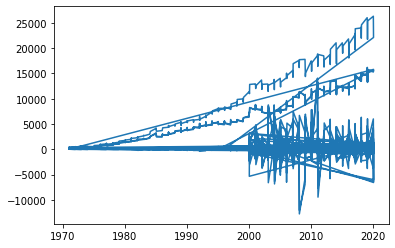

In [ ]:
plt.plot(df['Period'], df['Data_value'])
plt.show()

Что-то не то. Есть предположения что надо исправить?

In [ ]:
df = df.sort_values(['Period'])

In [ ]:
df

,index,Series_reference,Period,Data_value,STATUS,UNITS,MAGNTUDE,Subject,Group,Series_title_1
0,0,BOPQ.S06AC000000000A,1971.06,426.0,F,Dollars,6,Balance of Payments - BOP,"BPM6 Quarterly, Balance of payments major comp...",Actual
5514,6576,BOPQ.S06AC0000A11013,1971.06,24.0,F,Dollars,6,Balance of Payments - BOP,"BPM6 Quarterly, Current account goods",Actual
5927,7248,BOPQ.S06AC0000A12072,1971.06,2.0,F,Dollars,6,Balance of Payments - BOP,"BPM6 Quarterly, Current account services",Actual
6124,7445,BOPQ.S06AC0000A21021,1971.06,3.0,F,Dollars,6,Balance of Payments - BOP,"BPM6 Quarterly, Current account primary income",Actual
1561,1887,BOPQ.S06AC00000A1101,1971.06,350.0,F,Dollars,6,Balance of Payments - BOP,"BPM6 Quarterly, Current account goods",Actual
...,...,...,...,...,...,...,...,...,...,...
2893,3681,BOPQ.S06AC00000C211G,2020.06,0.0,F,Dollars,6,Balance of Payments - BOP,"BPM6 Quarterly, Balance of payments financial ...",Actual
471,671,BOPQ.S06AC000000000G,2020.06,-6581.0,F,Dollars,6,Balance of Payments - BOP,"BPM6 Quarterly, Balance of payments major comp...",Actual
6815,8232,BOPQ.S06AC0000A21024,2020.06,25.0,F,Dollars,6,Balance of Payments - BOP,"BPM6 Quarterly, Current account primary income",Actual
2299,3033,BOPQ.S06AC00000A2202,2020.06,365.0,F,Dollars,6,Balance of Payments - BOP,"BPM6 Quarterly, Current account secondary income",Actual


In [ ]:
np.unique(df['Series_reference']).shape

(87,)

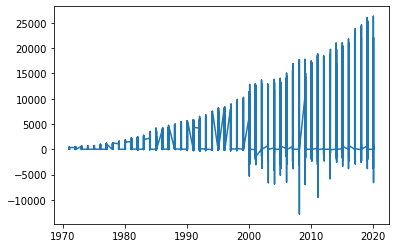

In [ ]:
plt.plot(df['Period'], df['Data_value'])
plt.show()

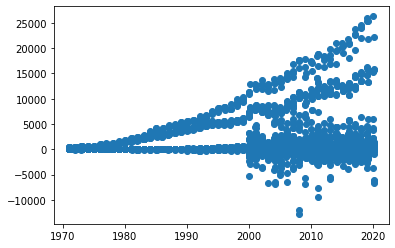

In [ ]:
plt.scatter(df['Period'], df['Data_value'])
plt.show()

Уже получше но все равно явно не то!

In [ ]:
series = np.unique(df['Series_reference'])
print(len(series))
print(series[:5])

87
['BOPQ.S06AC000000000A' 'BOPQ.S06AC000000000B' 'BOPQ.S06AC000000000E'
 'BOPQ.S06AC000000000G' 'BOPQ.S06AC0000000C11']


In [ ]:
df[df['Series_reference'] == series[0]]

,index,Series_reference,Period,Data_value,STATUS,UNITS,MAGNTUDE,Subject,Group,Series_title_1
0,0,BOPQ.S06AC000000000A,1971.06,426.0,F,Dollars,6,Balance of Payments - BOP,"BPM6 Quarterly, Balance of payments major comp...",Actual
1,1,BOPQ.S06AC000000000A,1971.09,435.0,F,Dollars,6,Balance of Payments - BOP,"BPM6 Quarterly, Balance of payments major comp...",Actual
2,2,BOPQ.S06AC000000000A,1971.12,360.0,F,Dollars,6,Balance of Payments - BOP,"BPM6 Quarterly, Balance of payments major comp...",Actual
3,3,BOPQ.S06AC000000000A,1972.03,417.0,F,Dollars,6,Balance of Payments - BOP,"BPM6 Quarterly, Balance of payments major comp...",Actual
4,4,BOPQ.S06AC000000000A,1972.06,528.0,F,Dollars,6,Balance of Payments - BOP,"BPM6 Quarterly, Balance of payments major comp...",Actual
...,...,...,...,...,...,...,...,...,...,...
192,192,BOPQ.S06AC000000000A,2019.06,25380.0,R,Dollars,6,Balance of Payments - BOP,"BPM6 Quarterly, Balance of payments major comp...",Actual
193,193,BOPQ.S06AC000000000A,2019.09,21734.0,R,Dollars,6,Balance of Payments - BOP,"BPM6 Quarterly, Balance of payments major comp...",Actual
194,194,BOPQ.S06AC000000000A,2019.12,25384.0,R,Dollars,6,Balance of Payments - BOP,"BPM6 Quarterly, Balance of payments major comp...",Actual
195,195,BOPQ.S06AC000000000A,2020.03,26303.0,R,Dollars,6,Balance of Payments - BOP,"BPM6 Quarterly, Balance of payments major comp...",Actual


In [ ]:
id_ = 0

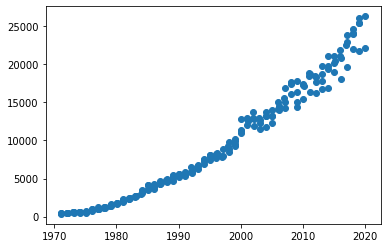

In [ ]:
plt.scatter(df[df['Series_reference'] == series[id_]]['Period'], df[df['Series_reference'] == series[id_]]['Data_value'])
plt.show()

В таком виде нельзя оставлять график. Давайте приведем его к хорошему виду

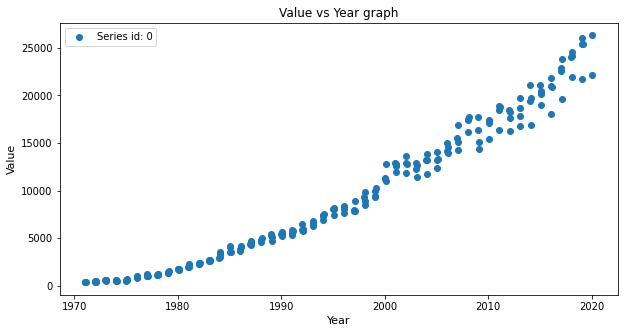

In [ ]:
plt.figure(figsize = (10,5))
plt.scatter(df[df['Series_reference'] == series[id_]]['Period'],
            df[df['Series_reference'] == series[id_]]['Data_value'],
            label = "Series id: " + str(id_))
plt.title('Value vs Year graph')
plt.xlabel('Year', fontsize = 11)
plt.ylabel('Value', fontsize = 11)
plt.legend()
plt.show()

А теперь используем **Seaborn**

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


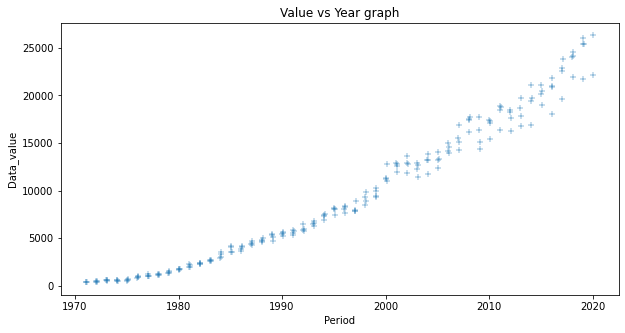

In [ ]:
plt.figure(figsize = (10,5))
sns.scatterplot(df[df['Series_reference'] == series[id_]]['Period'],
            df[df['Series_reference'] == series[id_]]['Data_value'], marker="+")
plt.title('Value vs Year graph')
plt.show()

### Читаем EXCEL файлы

In [ ]:
pd.read_excel('file_example_XLSX_1000.xlsx')

,Unnamed: 0,First Name,Last Name,Gender,Country,Age,Date,Id
0,1,Dulce,Abril,Female,United States,32,15/10/2017,1562
1,2,Mara,Hashimoto,Female,Great Britain,25,16/08/2016,1582
2,3,Philip,Gent,Male,France,36,21/05/2015,2587
3,4,Kathleen,Hanner,Female,United States,25,15/10/2017,3549
4,5,Nereida,Magwood,Female,United States,58,16/08/2016,2468
...,...,...,...,...,...,...,...,...
995,996,Roma,Lafollette,Female,United States,34,15/10/2017,2654
996,997,Felisa,Cail,Female,United States,28,16/08/2016,6525
997,998,Demetria,Abbey,Female,United States,32,21/05/2015,3265
998,999,Jeromy,Danz,Male,United States,39,15/10/2017,3265


## Задание 1
- убрать ненужный столбец Unnamed
- Отсортировать людей по возрасту
- разделить людей по полу
- построить гистаграмму возрастов мужчин и гистаграмму возрастов женщин